In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.collections import LineCollection

from utils.plot import cm
from utils.analysis import Simulation, Constants

import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
cm = 1/2.54

def rcparams():
    mpl.style.use('default')
    plt.rcParams.update({
        'savefig.format': 'pdf',

        'font.size': 8,
        'font.family': 'sans-serif',
        'font.sans-serif': 'Helvetica',
        'pdf.fonttype': 42,
        'ps.fonttype': 42,
        'text.usetex': False,
        
        'lines.linewidth':1.5,
        
        'figure.figsize': (8.5*cm,8.5*cm/2),

        'xtick.direction': 'out',
        'xtick.top': False,
        'xtick.bottom': True,
        'xtick.minor.visible': False,
        'xtick.labelsize': 8,
        'xtick.minor.size': 2,
        'xtick.minor.width': 0.5,
        'xtick.major.pad': 3,
        'xtick.major.size': 3,
        'xtick.major.width': 1,
        
        'ytick.direction': 'out',
        'ytick.right': False,
        'ytick.left': True,
        'ytick.minor.visible': False,
        'ytick.labelsize': 8,
        'ytick.direction': 'out',
        'ytick.minor.size': 2,
        'ytick.minor.width': 0.5,
        'ytick.major.pad': 3,
        'ytick.major.size': 3,
        'ytick.major.width': 1,

        'axes.grid': False,
        'axes.edgecolor': 'black',
        'axes.facecolor': 'white',
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.titlesize': 8,
        'axes.titlepad': 5,
        'axes.labelsize': 8,
        'axes.linewidth': 1,
        
        'legend.fontsize': 8,
        
        'figure.facecolor': 'white',
        'figure.dpi': 100,
        
        'savefig.transparent': True
    })

rcparams()

In [ ]:
const = Constants()

In [ ]:
def prob(arr):
    return sum(arr<const.R)/arr.size
lst = []
prob_lst =[]
for B in np.arange(0,22.5,2.5):
    for L in np.arange(25,250,25):
        r = np.linspace(0,40,41)
        sim = Simulation(B=B,F=14,A=1,L=L,R=0,subsample=False)
        mode = r[np.argmax(sim.distance_g(r))]
        dist = sim.distance
        lst.append([B,L,dist.mean(),prob(dist),mode,sim.distance.size])
df = pd.DataFrame(lst,columns=["B","L","mean","prob","mode","length"])

In [ ]:
def add_iso_line(ax, value, color, pivot):
    v = (pivot.reset_index()[pivot.columns].gt(value).values - pivot.reset_index()[pivot.columns].gt(value).shift(1,axis=1).values).astype(np.float64)
    v = np.nan_to_num(v, nan=0).astype(bool)
    h = pivot.gt(value).diff(axis=0).fillna(False).to_numpy()
    
    l = np.argwhere(v.T)    
    vlines = np.array(list(zip(l, np.stack((l[:,0], l[:,1]+1)).T)))
    
    l = np.argwhere(h.T)    
    hlines = np.array(list(zip(l, np.stack((l[:,0]+1, l[:,1])).T)))
    
    lines = np.vstack((vlines, hlines))
    ax.add_collection(LineCollection(lines, lw=1.5, colors=color ))

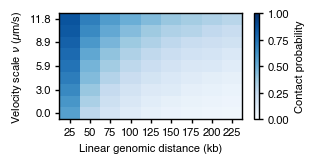

In [17]:
fig, ax = plt.subplots(figsize=(7.5*cm,3.5*cm))
prob_pivot = df.pivot(index="B",columns="L",values="prob").iloc[::-1]
prob_pivot.index = prob_pivot.index*const.De/const.Lk # nm/s
prob_pivot.index = np.round(prob_pivot.index/1000,1) # µm/s
sns.heatmap(prob_pivot,ax=ax,cmap="Blues",vmax=1,vmin=0,
            cbar_kws={"label":"Contact probability"})
for _, spine in ax.spines.items():
    spine.set_visible(True)
ax.collections[0].colorbar.outline.set_linewidth(1)
ax.set_xlabel("Linear genomic distance (kb)")
ax.set_ylabel(r"Velocity scale $\nu$ (µm/s)")
plt.yticks(rotation=0) 
fig.savefig("brownian_probability.pdf",transparent=True,bbox_inches="tight")

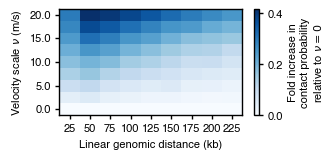

In [19]:
fig, ax = plt.subplots(figsize=(7.5*cm,3.5*cm))
prob_pivot = df.pivot(index="B",columns="L",values="prob").iloc[::-1]
prob_pivot_norm = prob_pivot-prob_pivot.iloc[-1]
sns.heatmap(prob_pivot_norm,ax=ax,cmap="Blues",
            cbar_kws={"label":"Fold increase in\ncontact probability\n"r"relative to $\nu=0$"})
for _, spine in ax.spines.items():
    spine.set_visible(True)
ax.collections[0].colorbar.outline.set_linewidth(1)
ax.set_xlabel("Linear genomic distance (kb)")
ax.set_ylabel(r"Velocity scale $\nu$ (m/s)")
plt.yticks(rotation=0)
fig.savefig("brownian_probability_normalized.pdf",transparent=True,bbox_inches="tight")